In [46]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Reading Data
data = pd.read_csv('/home/chathushka/Desktop/Reaserch/mydata.csv')
print(data.shape)
data.head()

(50000, 26)


,totalviews_channelelapsedtime,channelid,videocategoryid,channelviewcount,likes_subscriber,views_subscribers,videocount,subscribercount,videoid,dislikes_views,...,comments_views,totvideos_videocount,elapsedtime,videolikecount,videodislikecount,dislikes_subscriber,totviews_totsubs,views_elapsedtime,videopublished,videocommentcount
0,0.165199,UCdzU3DSGzyWzN2118yd9X9g,22,14654,0.555556,95.111111,30,18,--DwgB78t-c,0.000584,...,0.000000,488.466667,50040,10,1,0.055556,814.111111,0.034213,2012-01-19T18:38:28Z,0
1,1.133820,UC0UnhAG47DRyVZGVcbhAXhQ,10,105909,0.239130,59.326087,51,184,--NZRkXBV7k,0.000275,...,0.000183,2076.647059,22080,44,3,0.016304,575.592391,0.494384,2015-03-30T04:04:40Z,2
2,0.668120,UCXjtAvK5P3wXBGh0vbGylzg,27,48265,0.023669,10.289941,72,338,--hoQ2sGG4M,0.000288,...,0.000575,670.347222,71544,8,1,0.002959,142.795858,0.048613,2009-08-07T06:51:10Z,2
3,16.517982,UCpjYH_3HgCYCBEj5kOZ250A,26,625569,0.060052,11.130610,310,7710,--cPdta0k4Y,0.003344,...,0.001305,2017.964516,37464,463,287,0.037224,81.137354,2.290652,2013-06-27T03:09:09Z,112
4,0.839871,UCBFF3y6p-LqzD9bQSDgipgA,24,37895,0.237363,22.301099,8,455,--5iMsHNuDE,0.000394,...,0.001971,4736.875000,44040,108,4,0.008791,83.285714,0.230404,2012-09-26T15:10:52Z,20


In [47]:
#Calculatin X and Y
X = data['videoviewcount'].values
Y = data['videolikecount'].values 
videocategoryid = data['videocategoryid'].values

point = 0;
traindataViews = [0]*11086
traindataLike = [0]*11086
for i in range(len(X)):
    if(videocategoryid[i]==10):
        traindataViews[point] = X[i]
        traindataLike[point] = Y[i]
        point+=1
    elif(videocategoryid[i]==23):
        traindataViews[point] = X[i]
        traindataLike[point] = Y[i]
        point+=1
    elif(videocategoryid[i]==29):
        traindataViews[point] = X[i]
        traindataLike[point] = Y[i]
        point+=1

In [48]:
for i in range(len(traindataViews)):
    if(traindataViews[i]>500000):
        traindataViews[i]=np.mean(traindataViews)
        

In [49]:
# Mean X and Y
mean_x = np.mean(traindataViews)
mean_y = np.mean(traindataLike)

# Total Number of values
n = len(traindataViews)

# Using the formula to calculate b1 and b2
number = 0
den =0
for i in range(n):
    number+=(traindataViews[i] - mean_x)*(traindataLike[i] - mean_y)
    den += (traindataViews[i] - mean_x) ** 2
b1 = number / den
b0 = mean_y - (b1 * mean_x)

#print coefficients
print(b1, b0)

0.008969324906095182 204.2038453804999


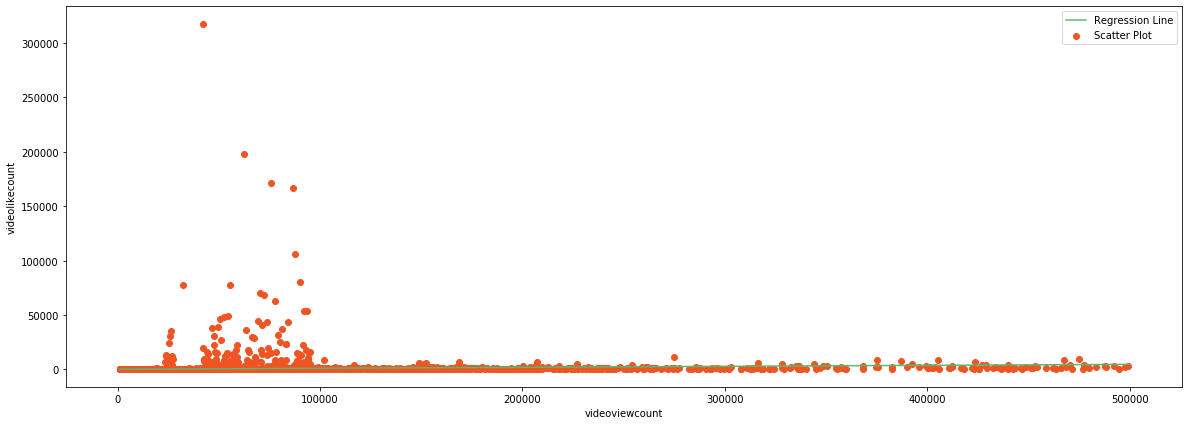

In [50]:
# Plotting values and Regression Line
plt.figure(figsize=(20,7))
max_x = np.max(traindataViews) + 100
min_x = np.min(traindataViews) - 100

#Calculating Line Values x and y
x = np.linspace(min_x, max_x,10) 
y = b0 + b1 * x

#ploting line
plt.plot(x, y, color='#58b970', label='Regression Line')
#plotting Scatter Points
plt.scatter(traindataViews, traindataLike, c='#ef5423', label='Scatter Plot')

plt.xlabel('videoviewcount')
plt.ylabel('videolikecount')

plt.legend()
plt.show()

In [51]:
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = b0 +b1 * traindataViews[i]
    ss_t += (traindataLike[i] - mean_y)**2
    ss_r += (traindataLike[i] - y_pred) **2
    
r2 = 1 - (ss_r/ss_t)
print(r2)

0.009275569704685127
